<a href="https://colab.research.google.com/github/arvindnswamy/BoundaryLayers/blob/master/HW6_Pb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

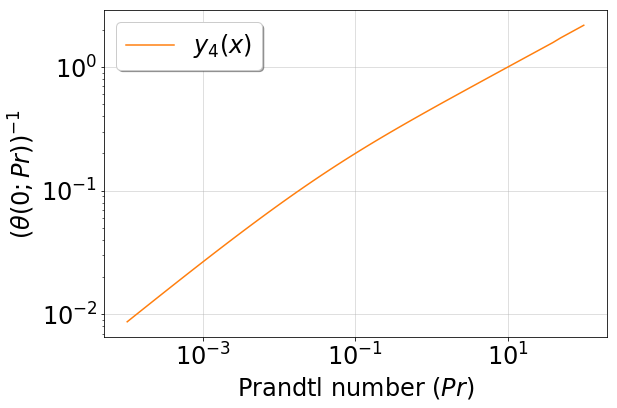

u/U_{\infty} = 0.99 when eta =  4.909914076637683
mean value of Pr exponent for low Pr is:  0.48540160898262164
mean value of Pr exponent for mod/hi Pr is:  0.3382164870217161
C for low Pr is: 0.7586106265995352
C for high Pr is: 0.4582237309094709


In [0]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.integrate import solve_bvp
import matplotlib

from scipy import interpolate


matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['legend.fontsize'] = 24


Pr = np.logspace(-4,2,60)

counter = 0
n=600
#theta = np.zeros((len(Pr),6,n))
theta = np.zeros((len(Pr),n))
#thetap= []


for p in Pr:
  eps = 0.1
  
  def odetobesolved(t, y):
    #when mwedge = 0, you should get back the results of the flat plate solution
    return np.vstack((y[1], y[2], -0.5*y[0]*y[2], y[4], -0.5*p*(y[4]*y[0]-y[1]*y[3]))) 

  def odebc(ya, yb):
    return np.array([ya[0], ya[1],  yb[1]-1.0, ya[4]+1.0, yb[3]])
  
  xmax = np.max((10.0, 10*(1/p)**(0.5))) #Code to increase the range over which eta is integrated for low Pr fluids
 
  x = np.linspace(0.0, xmax, n)
  y = np.array([(1-np.exp(-x))*x, 1-np.exp(-x), x*np.exp(-x), (1-np.exp(-x))*x, 1-np.exp(-x)]) #initial guess

  sol = solve_bvp(odetobesolved, odebc, x, y)
  

  if sol.status != 0:
      print("WARNING: sol.status is %d" % sol.status)
  theta[counter,:] = sol.y[3,0]
  counter += 1
  

f, (ax1) = plt.subplots(1, figsize=(9,6))
ax1.plot(Pr,theta[:,0]**(-1), '-', color='C1', label='$y_4(x)$')
ax1.grid(alpha=0.5)
ax1.legend(framealpha=1, shadow=True)
ax1.set_xlabel(r'Prandtl number $(Pr)$')
ax1.set_ylabel(r'$(\theta(0;Pr))^{-1}$')
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.show()


f = interpolate.interp1d(sol.y[1], sol.x) #interpolating
print('u/U_{\infty} = 0.99 when eta = ', f(0.99))

#Exponent for Pr number - low Pr limit
#Choose Pr lower than 0.01
lowPr = Pr[0:20]
lowPrTheta = theta[0:20,0]
#The slope on the graph below is the exponent of Pr.
nlowPrApprox = np.log(lowPrTheta[0]/lowPrTheta[1:])/np.log(lowPr[1:]/lowPr[0])
#If we have done all things right, nlowPrApprox must be an array which is approximately the theoretical value.
print('mean value of Pr exponent for low Pr is: ', np.mean(nlowPrApprox))

modhiPr = Pr[40:]
modhiPrTheta = theta[40:,0]
nmodhiPrApprox = np.log(modhiPrTheta[-1]/modhiPrTheta[:-1])/np.log(modhiPr[:-1]/modhiPr[-1])
print('mean value of Pr exponent for mod/hi Pr is: ', np.mean(nmodhiPrApprox))

mean_nlowPr = np.mean(nlowPrApprox)
mean_nmodhiPr = np.mean(nmodhiPrApprox)

mean_ClowPr = np.mean((lowPrTheta**(-1))/lowPr**mean_nlowPr)
mean_CmodhiPr = np.mean(modhiPrTheta**(-1)/modhiPr**mean_nmodhiPr)

print('C for low Pr is:', mean_ClowPr)
print('C for high Pr is:', mean_CmodhiPr)